In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


### Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### 1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.


In [2]:
# Read the Dataset

data = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
# To get an idea of the data types of the columns in DataFrame

data.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [6]:
# To find missing values in dataset

data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
# Summary of data

data.describe(include="all")

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [9]:
# To find shape of dataset

data.shape

(210, 7)

In [10]:
# To find the duplicated values

data.duplicated().sum()

0

In [11]:
#data = data.iloc[:, 1:7] 

In [12]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


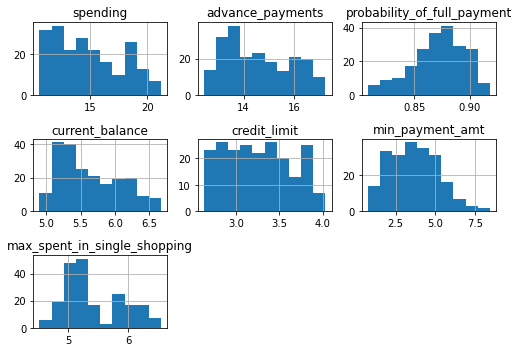

In [13]:
# checking distributions using histograms

x=data.copy()
fig =plt.figure(figsize =(7, 5))
ax =fig.gca()
x.hist(ax =ax)
plt.tight_layout()
plt.show()

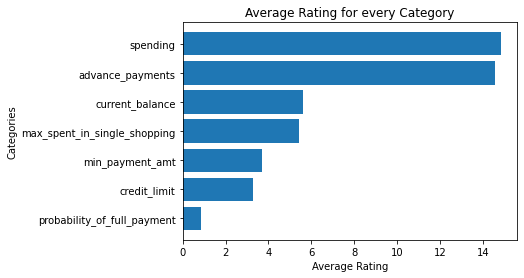

In [14]:
# Draw a horizontal bar plot
# Calculate the average value for each column
# Index AvgR so that it only includes values for the same number of columns as data.columns[1:]

AvgR=data.mean()
AvgR=AvgR.sort_values()
y = np.arange(len(AvgR.values))
d_AvgR = AvgR[:len(data.columns[0:7])]
plt.barh(np.arange(len(data.columns[0:7])),AvgR.values,align='center')
plt.yticks(np.arange(len(data.columns[0:7])),AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average Rating')
plt.title('Average Rating for every Category')
plt.show()

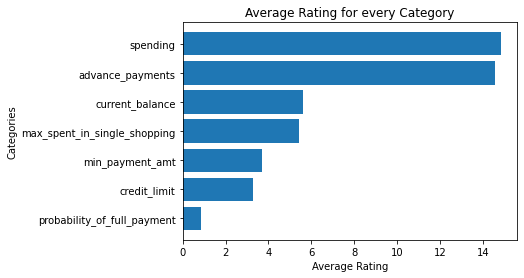

In [15]:
# Draw a horizontal bar plot
# Calculate the average value for each column
# Index AvgR so that it only includes values for the same number of columns as data.columns[1:]

AvgR = AvgR[:len(data.columns[0:7])]
plt.barh(np.arange(len(data.columns[0:7])),AvgR.values,align='center')
plt.yticks(np.arange(len(data.columns[0:7])),AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average Rating')
plt.title('Average Rating for every Category')
plt.show()

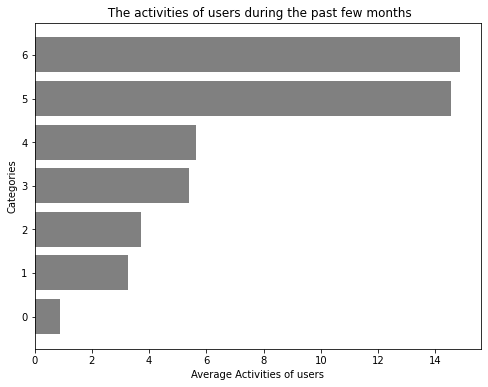

In [16]:
# checking distributions using histograms

AvgR=data.mean()
AvgR=AvgR.sort_values()
y = np.arange(len(AvgR.values))
plt.figure(figsize=(8, 6))
ax= plt.axes()
plt.barh(y, AvgR.values, align='center', color='grey')
#plt.yticks(np.arange(len(data.columns[1:])))
#ax.set_yticks((data.columns))
#ax.set_yticks((2, 5, 7, 10))
plt.ylabel('Categories')
plt.xlabel('Average Activities of users')
plt.title(' The activities of users during the past few months')
plt.show()

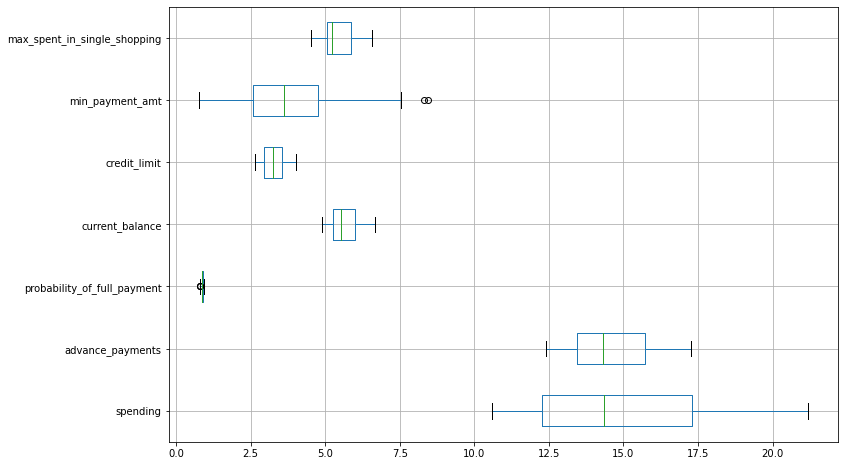

In [17]:
# construct box plot for continuous variables

plt.figure(figsize=(12,8))
data[['spending', 'advance_payments','probability_of_full_payment', 'current_balance', 'credit_limit','min_payment_amt', 'max_spent_in_single_shopping']].boxplot(vert=0)
plt.show()

<AxesSubplot:>

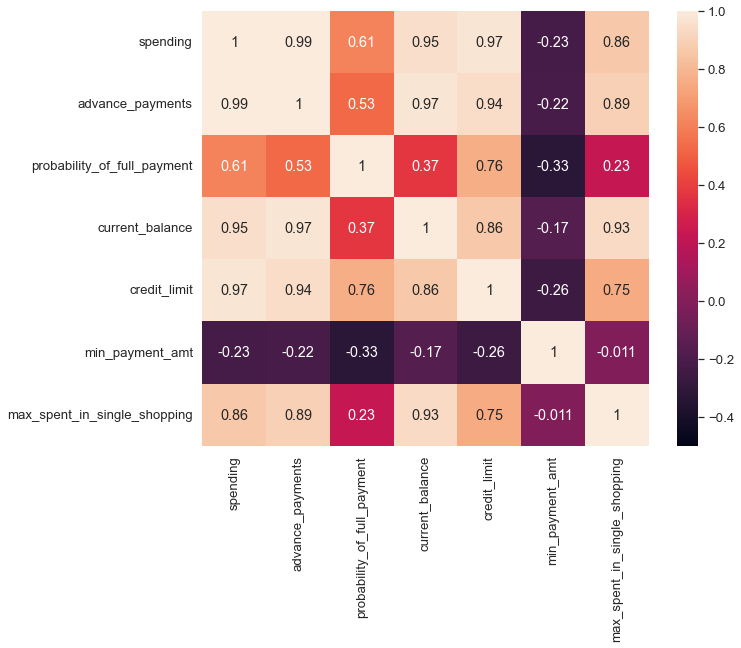

In [18]:
# construct heatmap with only continuous variables to find correlation.

plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data[['spending', 'advance_payments','probability_of_full_payment', 'current_balance', 'credit_limit','min_payment_amt', 'max_spent_in_single_shopping']].corr(), annot=True,vmin=-0.5,vmax=1)


In [19]:
# Calculate mean
mean = np.mean(data)

# Calculate median
median = np.median(data)

# Calculate standard deviation
std = np.std(data)

# Calculate skewness
skewness = (mean - median) / std

print("Skewness: ", skewness)

#This code calculates the mean, median, and standard deviation of the sample data, which is a list of 10 values ranging from 1 to 10. It then uses these values to calculate the sample skewness using the formula provided earlier.

#Keep in mind that this is just one way to calculate skewness in Python, and there are other methods and libraries available as well. Additionally, it's always a good idea to validate your results and make sure they make sense in the context of your data and analysis.


Skewness:  spending                          3.321154
advance_payments                  7.178353
probability_of_full_payment    -183.938619
current_balance                   0.953680
credit_limit                     -5.170707
min_payment_amt                  -1.004551
max_spent_in_single_shopping      0.410091
dtype: float64


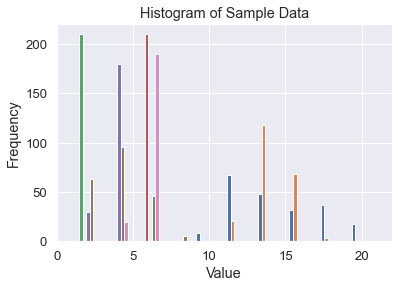

In [20]:
# Create histogram

plt.hist(data)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Show plot
plt.show()

### 1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = StandardScaler()

In [23]:
scaled_df = X.fit_transform(data)

In [24]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

### 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
# Clustering Illustrative#No Need for scaling as all variables have the same weightage. 

x=pd.DataFrame(x)
x_subset1=x.loc[100:120,:].values

Text(0.5, 0, 'Users')

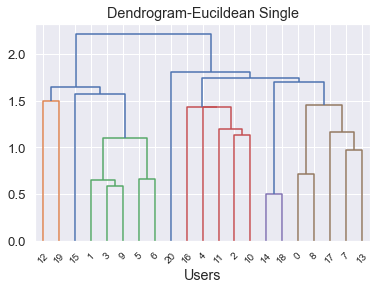

In [27]:
from scipy.cluster.hierarchy import dendrogram

dendrogram = dendrogram(linkage(x_subset1, method="single", metric='euclidean'))
plt.title('Dendrogram-Eucildean Single')
plt.xlabel('Users')

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

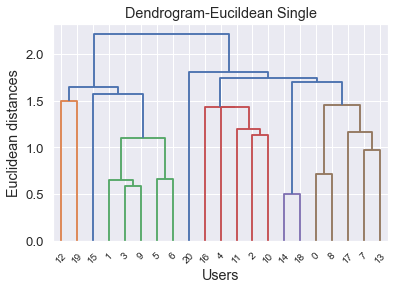

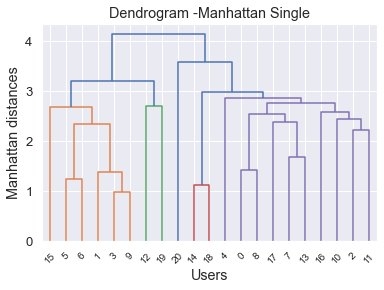

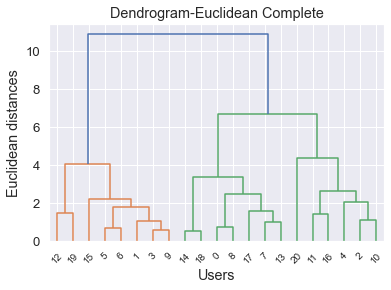

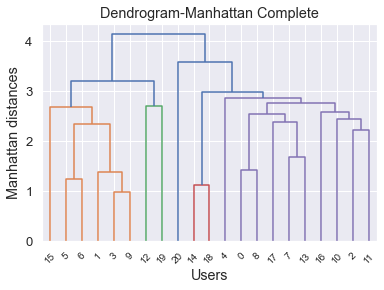

In [29]:
my_dendrogram = dendrogram(linkage(x_subset1, method="single", metric='euclidean'))
plt.title('Dendrogram-Eucildean Single')
plt.xlabel('Users')

my_dendrogram=dendrogram(linkage(x_subset1,method="single",metric='euclidean'))
plt.title('Dendrogram-Eucildean Single')
plt.xlabel('Users')
plt.ylabel('Euclidean distances')
plt.show()

my_dendrogram=dendrogram(linkage(x_subset1,method="single",metric='cityblock'))
plt.title('Dendrogram -Manhattan Single')
plt.xlabel('Users')
plt.ylabel('Manhattan distances')
plt.show()

my_dendrogram=dendrogram(linkage(x_subset1,method="complete",metric='euclidean'))
plt.title('Dendrogram-Euclidean Complete')
plt.xlabel('Users')
plt.ylabel('Euclidean distances')
plt.show()

my_dendrogram=dendrogram(linkage(x_subset1,method="single",metric='cityblock'))
plt.title('Dendrogram-Manhattan Complete')
plt.xlabel('Users')
plt.ylabel('Manhattan distances')
plt.show()


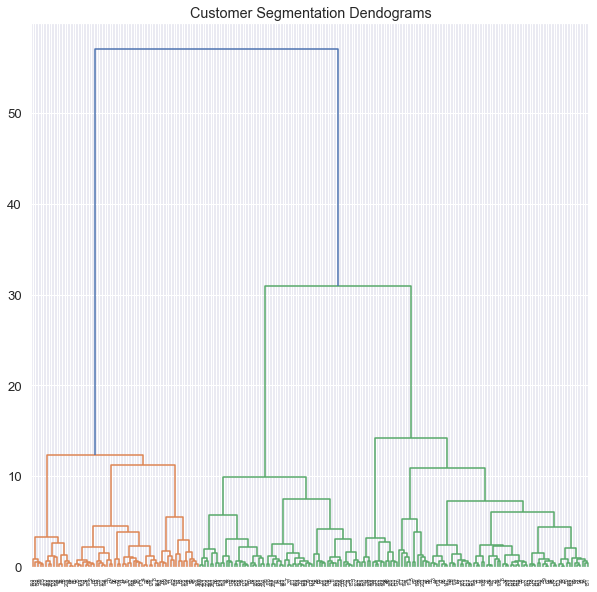

In [30]:
# To find clustering using Ward’s method

wardlink = linkage(data, method = 'ward')
plt.figure(figsize=(10,10))
plt.title("Customer Segmentation Dendograms")
dend = dendrogram(wardlink)

Text(0, 0.5, 'distance')

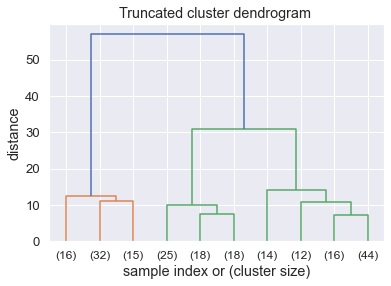

In [31]:
# Truncating the cluster

dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.title('Truncated cluster dendrogram ')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

In [32]:
from scipy.cluster.hierarchy import fcluster

In [33]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters


array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [34]:
# Method 2

clusters = fcluster(wardlink, 23, criterion='distance')
clusters


array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [35]:
data['clusters'] = clusters

In [36]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [37]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
Cluster_No = cluster.fit_predict(x)
print(Cluster_No)

[ 5  6  5  9  5  2 10  8  5  1  5  6  1  5  3 10  7  9 10  1  1 10  5  1
  6  6  3  2  1  2  8  1 10  7 10  9  2 10 10  5  5  8  4  5  9  1  3  5
  0  5  1  0  0  5  5  4 10  9  9  0  6  9  1  6  7  5  0  8  5  1  8 10
  5  0  2  5  7 10  4  8  7  3  8  0  1  6 11  6  4  2  2  0  7  1  1  5
  5  4  9  4 10  5  6  5  7  0  0  2 10  0 11  8  0  2  9  4  8  2  9  0
  3  1 10  1  8  7  5  9  8  8  1  7  1  5 10  4  0  1  4  6  6  7  1  1
  3 10  5  9  8 10  8  1  6 11  3  7  1  9  7  4  0 10  5  4  5  9  6  7
  3  3  7  9  8  5  5  5  6  3 11  9  7  8  3  8 11  4  3  6  3 10  3  6
 10  4  7  4  5 10  5  2  7 11  6  2  4  6  4  8 11 11]


In [38]:
x['Cluster'] =Cluster_No

In [39]:
### Let's select some specific features and find out how well clusters are differentiating the same

x_analysis = x.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
x_analysis.groupby(x_analysis.columns[-1]).mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster,,,,,,,
0,19.583333,16.646000,0.887727,6.315867,3.835067,5.081533,6.144400
1,11.843043,13.216957,0.851322,5.214087,2.843609,3.729783,5.060391
2,12.555833,13.496667,0.864192,5.279750,3.009500,6.854917,5.108000
3,12.337857,13.339286,0.870936,5.160786,2.986929,2.031793,4.844857
4,16.980625,15.621875,0.874056,5.963375,3.504688,4.253875,5.858937
5,18.980000,16.397188,0.887100,6.253375,3.750375,2.695562,6.122844
6,15.011667,14.625000,0.881928,5.624556,3.330333,3.905500,5.265722
7,15.151765,14.683529,0.882976,5.630941,3.343412,1.551535,5.174941
8,13.976667,14.127778,0.880083,5.456444,3.207611,2.600944,5.030056


In [40]:
x_analysis.columns[-1]

'Cluster'

In [41]:
### Let's select some specific features and find out how well clusters are differentiating the same
x_analysis=x[['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping','Cluster']]
x_analysis.groupby('Cluster').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster,,,,,,,
0,19.583333,16.646000,0.887727,6.315867,3.835067,5.081533,6.144400
1,11.843043,13.216957,0.851322,5.214087,2.843609,3.729783,5.060391
2,12.555833,13.496667,0.864192,5.279750,3.009500,6.854917,5.108000
3,12.337857,13.339286,0.870936,5.160786,2.986929,2.031793,4.844857
4,16.980625,15.621875,0.874056,5.963375,3.504688,4.253875,5.858937
5,18.980000,16.397188,0.887100,6.253375,3.750375,2.695562,6.122844
6,15.011667,14.625000,0.881928,5.624556,3.330333,3.905500,5.265722
7,15.151765,14.683529,0.882976,5.630941,3.343412,1.551535,5.174941
8,13.976667,14.127778,0.880083,5.456444,3.207611,2.600944,5.030056


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Report must contain logical and correct explanations for choosing the optimum clusters using the elbow method. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.


In [42]:
# To find k- Means clustering k =1

k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_


1470.0000000000002

In [43]:
k_means = KMeans(n_clusters = 2)

In [44]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [45]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [46]:
k_means.inertia_

659.1717544870406

In [47]:
# To find k- Means clustering k=3

k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_


430.6589731513006

In [48]:
# To find k- Means clustering k=4

k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_


371.74655984791383

In [49]:
# To find k- Means clustering k=5

k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_


326.55192979381303

In [50]:
# To find k- Means clustering k=6

k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_


289.4671705641288

In [51]:
# Plot wss plot

wss =[] 

In [52]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
    

In [53]:
wss

[1470.0000000000002,
 659.1717544870406,
 430.6589731513006,
 371.5811909715525,
 328.0116796724968,
 289.2039686723839,
 262.9029430342948,
 240.56575679095573,
 222.60724638078852,
 209.1964991815317]

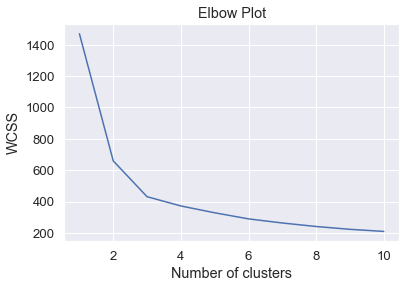

In [54]:
# To plot WSS plot

plt.plot(range(1,11), wss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The Elbow method looks at the total WCSS as a function of the number of clusters.
#### The Elbow curve indicate break in the elbow after k=2.  Hence one option for optimum number of clusters is 2 and thereafter dip is visible for k=10.

In [55]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [56]:
data["Clus_kmeans"] = labels
data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


### 1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.


In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [58]:
# Silhouette score

silhouette_score(scaled_df,labels)

0.40072705527512986

In [59]:
# Silhouette width

sil_width = silhouette_samples(scaled_df,labels)

In [60]:
data["sil_width"] = sil_width
data.head(5)


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.362276


In [61]:
# silhouette samples

silhouette_samples(scaled_df,labels).min()


0.002713089347678376

#### This  method  measures  how  tightly  the  observations  are  clustered  and  the  average  distance between clusters.

In [62]:
# Silhouette Method

ss={1:0}
for i in range(2,20):
    clusterer=KMeans(n_clusters=i,init='k-means++',random_state=42)
    y=clusterer.fit_predict(x)
    # The higher (up to 1) the better
    s=silhouette_score(x, y)
    ss[i]=round(s,5)
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.38836
The Average Silhouette Score for 3 clusters is 0.51953
The Average Silhouette Score for 4 clusters is 0.52838
The Average Silhouette Score for 5 clusters is 0.56497
The Average Silhouette Score for 6 clusters is 0.58958
The Average Silhouette Score for 7 clusters is 0.5808
The Average Silhouette Score for 8 clusters is 0.5592
The Average Silhouette Score for 9 clusters is 0.57743
The Average Silhouette Score for 10 clusters is 0.57448
The Average Silhouette Score for 11 clusters is 0.57506
The Average Silhouette Score for 12 clusters is 0.56163
The Average Silhouette Score for 13 clusters is 0.54909
The Average Silhouette Score for 14 clusters is 0.52642
The Average Silhouette Score for 15 clusters is 0.53418
The Average Silhouette Score for 16 clusters is 0.50864
The Average Silhouette Score for 17 clusters is 0.48478
The Average Silhouette Score for 18 clusters is 0.46579
The Average Silhouette Score for 19 clusters is 0.47193


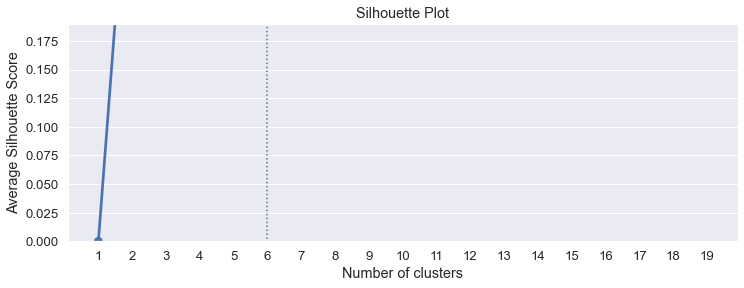

In [63]:
# To plot Silhouette plot

maxkey=[key for key, value in ss.items() if value ==max(ss.values())][0]
fig,ax =plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.25,linestyles='dotted')
ax.set(ylim=(0, 0.19))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Score')
plt.show()

#### Plot is clear from that the maximum value of average silhouettescoreis achieved for k= 6, which, therefore, is considered to be the optimum number of clusters for this data.

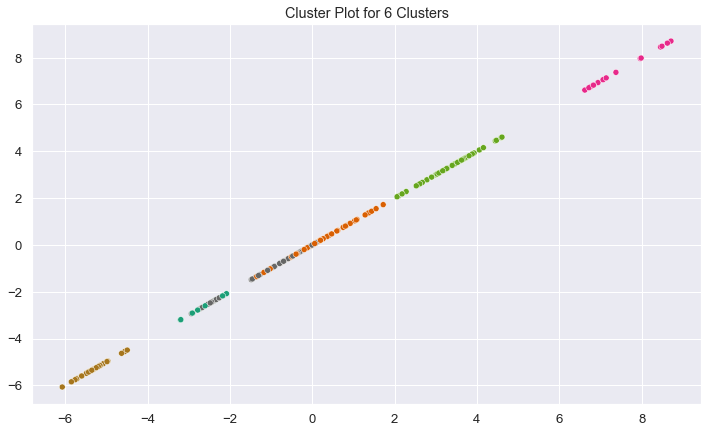

In [64]:
from sklearn.decomposition import PCA

pca_1 = PCA(1)
plot_columns = pca_1.fit_transform(x)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,0],y=plot_columns[:,-1],hue=KMeans(n_clusters=6,random_state=0).fit(x).labels_,palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 6 Clusters')
plt.show()

In [65]:
from scipy.cluster.vq import vq

# Fit a KMeans model to the data
kmeans = KMeans(n_clusters=6,random_state=0).fit(x)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Compute the Euclidean distance from each point to the nearest centroid
euc_distance_to_centroids, _ = vq(x, centroids)

# Compute the WSS
SSW = np.sum(euc_distance_to_centroids**2)

# Compute the TSS
TSS = np.sum((x - x.mean(0))**2)

# Compute the BSS
SSB = TSS - SSW

print('Between Sum of Squares is', round(SSB,2))
print('Total Sum of Squares is', round(TSS,2))

# Compute the WSS for each cluster
WSS = pd.DataFrame([euc_distance_to_centroids**2, kmeans.labels_]).T
print('The Within Sum of Squares is', np.round(WSS.groupby(1).sum().values,2))
print('Total Within Sum of Squares is', round(SSW,2))
print('The Cluster Size is', WSS.groupby(1).count().values)


Between Sum of Squares is spending                         421.47
advance_payments                -991.54
probability_of_full_payment    -1347.88
current_balance                -1306.97
credit_limit                   -1318.18
min_payment_amt                 -875.52
max_spent_in_single_shopping   -1297.52
Cluster                          864.50
dtype: float64
Total Sum of Squares is spending                        1769.47
advance_payments                 356.46
probability_of_full_payment        0.12
current_balance                   41.03
credit_limit                      29.82
min_payment_amt                  472.48
max_spent_in_single_shopping      50.48
Cluster                         2212.50
dtype: float64
The Within Sum of Squares is [[  0]
 [ 37]
 [192]
 [135]
 [784]
 [200]]
Total Within Sum of Squares is 1348
The Cluster Size is [[53]
 [37]
 [48]
 [15]
 [49]
 [ 8]]


#### The algorithm for k-means is a greedy algorithm and is sensitive to the random starting points.  k =6

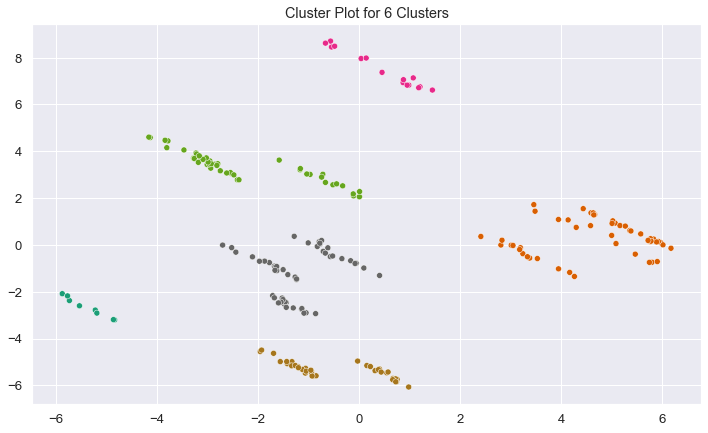

In [66]:
from sklearn.decomposition import PCA

pca_2=PCA(2)
plot_columns=pca_2.fit_transform(x)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,1],y=plot_columns[:,0],hue=KMeans(n_clusters=6,random_state=0).fit(x).labels_,palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 6 Clusters')
plt.show()

#### Cluster for k = 6

In [67]:
# Fit a KMeans model to the data
kmeans = KMeans(n_clusters=2,random_state=0).fit(x)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Compute the Euclidean distance from each point to the nearest centroid
euc_distance_to_centroids, _ = vq(x, centroids)

# Compute the WSS
SSW = np.sum(euc_distance_to_centroids**2)

# Compute the TSS
TSS = np.sum((x - x.mean(0))**2)

# Compute the BSS
SSB = TSS - SSW

print('Between Sum of Squares is', round(SSB,2))
print('Total Sum of Squares is', round(TSS,2))

# Compute the WSS for each cluster
WSS = pd.DataFrame([euc_distance_to_centroids**2, kmeans.labels_]).T
print('The Within Sum of Squares is', np.round(WSS.groupby(1).sum().values,2))
print('Total Within Sum of Squares is', round(SSW,2))
print('The Cluster Size is', WSS.groupby(1).count().values)


Between Sum of Squares is spending                        1706.47
advance_payments                 293.46
probability_of_full_payment      -62.88
current_balance                  -21.97
credit_limit                     -33.18
min_payment_amt                  409.48
max_spent_in_single_shopping     -12.52
Cluster                         2149.50
dtype: float64
Total Sum of Squares is spending                        1769.47
advance_payments                 356.46
probability_of_full_payment        0.12
current_balance                   41.03
credit_limit                      29.82
min_payment_amt                  472.48
max_spent_in_single_shopping      50.48
Cluster                         2212.50
dtype: float64
The Within Sum of Squares is [[ 0]
 [63]]
Total Within Sum of Squares is 63
The Cluster Size is [[147]
 [ 63]]


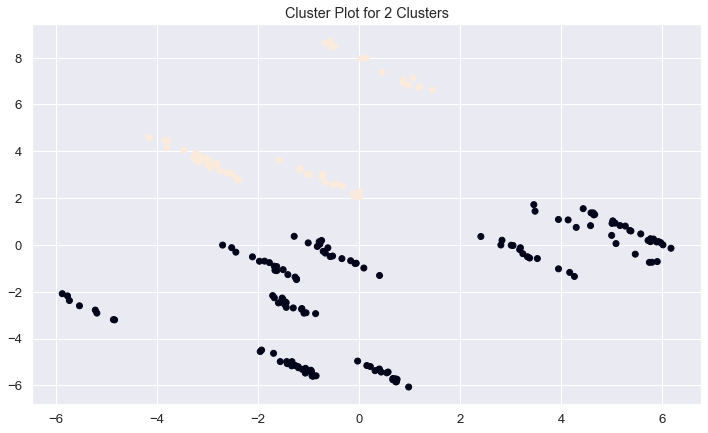

In [68]:
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(x)
plt.figure(figsize=(12,7))
plt.scatter(x=plot_columns[:,1],y=plot_columns[:,0],c=KMeans(n_clusters=2,random_state=0).fit(x).labels_)
plt.title('Cluster Plot for 2 Clusters')
plt.show()


#### Problem 2: CART-RF

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


### 2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.


In [70]:
insurance_df = pd.read_csv('insurance_part2_data.csv')

In [71]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [72]:
insurance_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [73]:
insurance_df.shape

(3000, 10)

In [74]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [75]:
# To get an idea of the data types of the columns in your DataFrame

insurance_df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [76]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in insurance_df.columns: 
    if insurance_df[feature].dtype == 'object': 
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes
        

In [77]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [78]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [79]:
# To find missing values

insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [80]:
# Summary of data

insurance_df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,1.306333,0.612333,0.308000,14.529203,0.984667,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.994060,0.487299,0.461744,25.481455,0.122895,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,4.630000,1.000000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,2.000000,1.000000,1.000000,17.235000,1.000000,63.000000,69.000000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


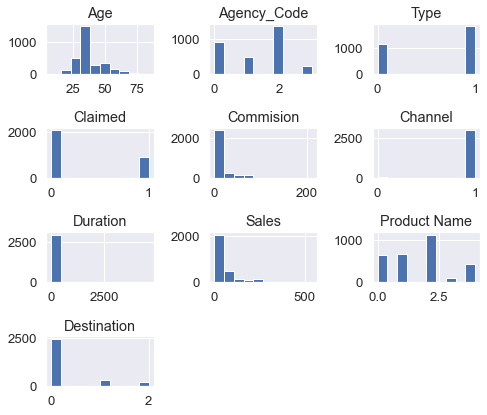

In [81]:
# checking distributions using histograms

x=insurance_df.copy()
fig =plt.figure(figsize =(7, 6))
ax =fig.gca()
x.hist(ax =ax)
plt.tight_layout()
plt.show()


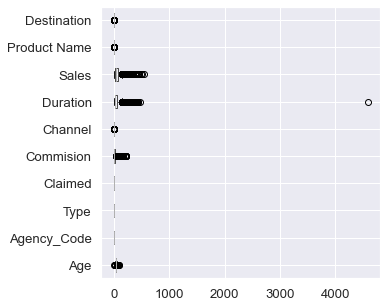

In [82]:
# construct box plot for continuous variables to detect outliers.

plt.figure(figsize=(5,5))
insurance_df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales', 'Product Name', 'Destination']].boxplot(vert=0)
plt.show()

#### There are many outliers in the Sales, age, Duration, and Commision

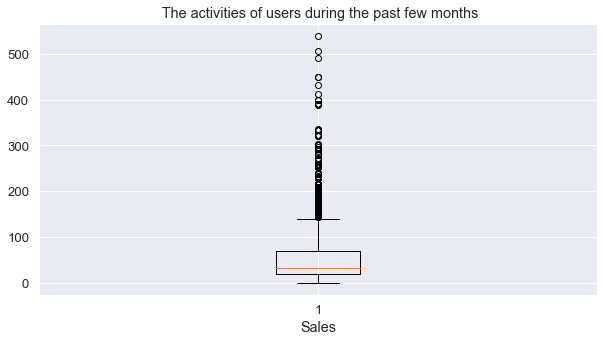

In [83]:
# Boxplot for sales column

plt.figure(figsize=(10, 5))
plt.boxplot(insurance_df['Sales'])
# plt.ylabel('Categories')
plt.xlabel('Sales')
plt.title(' The activities of users during the past few months')
plt.show()


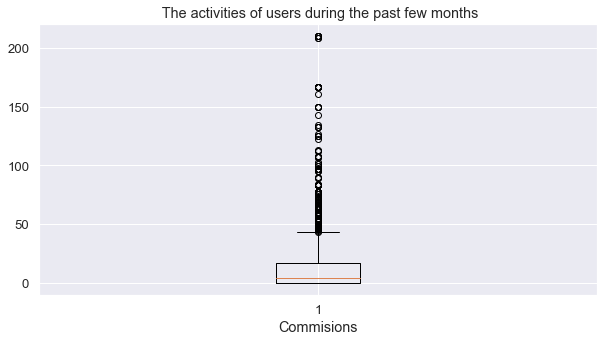

In [84]:
# Boxplot for Commision column

plt.figure(figsize=(10, 5))
plt.boxplot(insurance_df['Commision'])
# plt.ylabel('Categories')
plt.xlabel('Commisions')
plt.title(' The activities of users during the past few months')
plt.show()

In [85]:
list(insurance_df.groupby(['Product Name'])['Sales'].sum())

[25640.39, 21672.94, 54373.16, 19592.05, 59471.2]

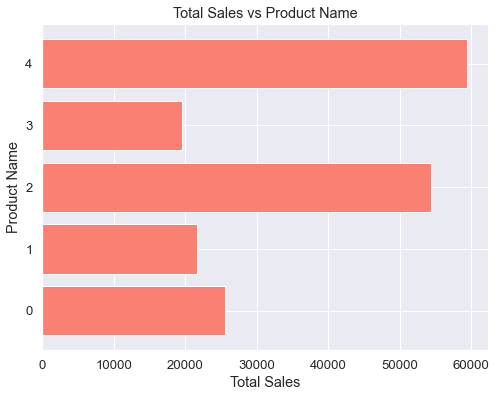

In [86]:
x = sorted(list(insurance_df['Product Name'].unique()))
y = list(insurance_df.groupby(['Product Name'])['Sales'].sum())
plt.figure(figsize=(8, 6))
ax= plt.axes()
plt.barh(x,y , align='center', color='salmon')
#plt.yticks(np.arange(len(data.columns[1:])))
#ax.set_yticks((data.columns))
#ax.set_yticks((2, 5, 7, 10))
plt.ylabel('Product Name')
plt.xlabel('Total Sales')
plt.title('Total Sales vs Product Name')
plt.show()

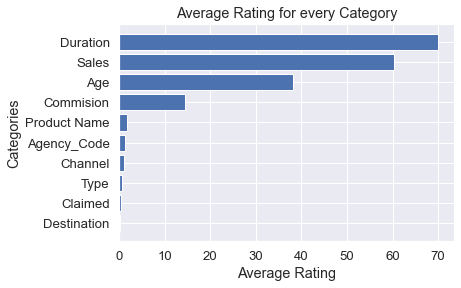

In [87]:
# Draw a horizontal bar plot
# Calculate the average value for each column
# Index AvgR so that it only includes values for the same number of columns as data.columns[1:]

AvgR=insurance_df.mean()
AvgR=AvgR.sort_values()
y = np.arange(len(AvgR.values))
d_AvgR = AvgR[:len(insurance_df.columns[0:10])]
plt.barh(np.arange(len(insurance_df.columns[0:10])),AvgR.values,align='center')
plt.yticks(np.arange(len(insurance_df.columns[0:10])),AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average Rating')
plt.title('Average Rating for every Category')
plt.show()

In [88]:
insurance_df['Claimed'].value_counts()/insurance_df.shape[0]

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [89]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


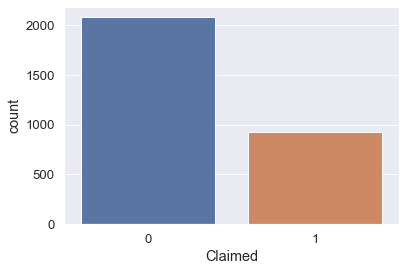

In [90]:
# To plot countplot for Claimed

sns.countplot(insurance_df['Claimed']);


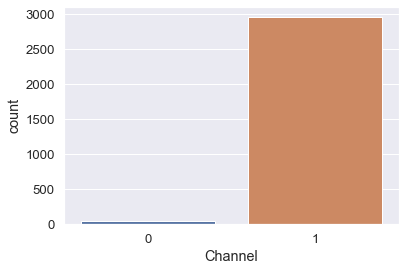

In [91]:
# To plot countplot for Channel

sns.countplot(insurance_df['Channel']);


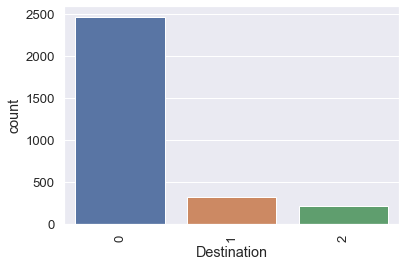

In [92]:
# To plot countplot for Destination

sns.countplot(insurance_df['Destination']);
plt.xticks(rotation=90);


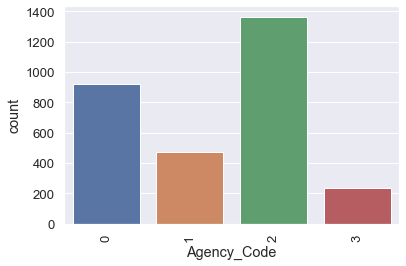

In [93]:
# To plot countplot for Agency_Code

sns.countplot(insurance_df['Agency_Code']);
plt.xticks(rotation=90);


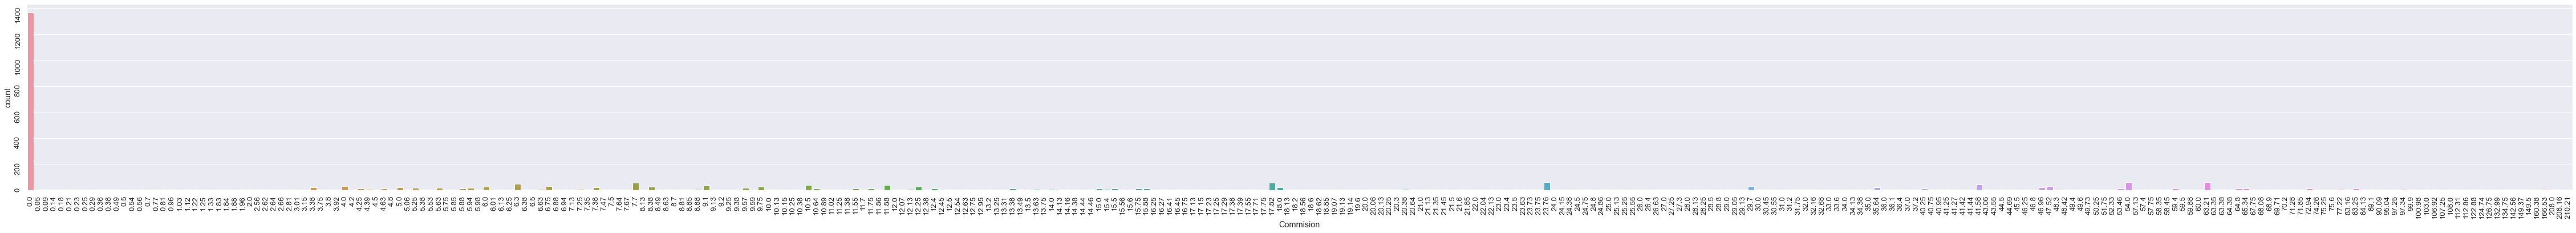

In [94]:
# To plot countplot for Commision

plt.figure(figsize=(80, 6))
sns.countplot(insurance_df['Commision']);
plt.xticks(rotation=90);
plt.yticks(rotation=90);


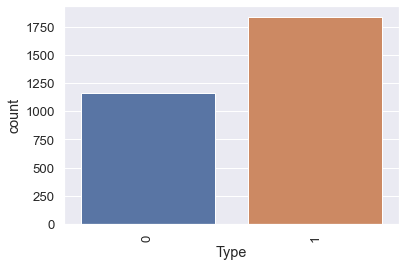

In [95]:
# To plot countplot for Type

sns.countplot(insurance_df['Type']);
plt.xticks(rotation=90);


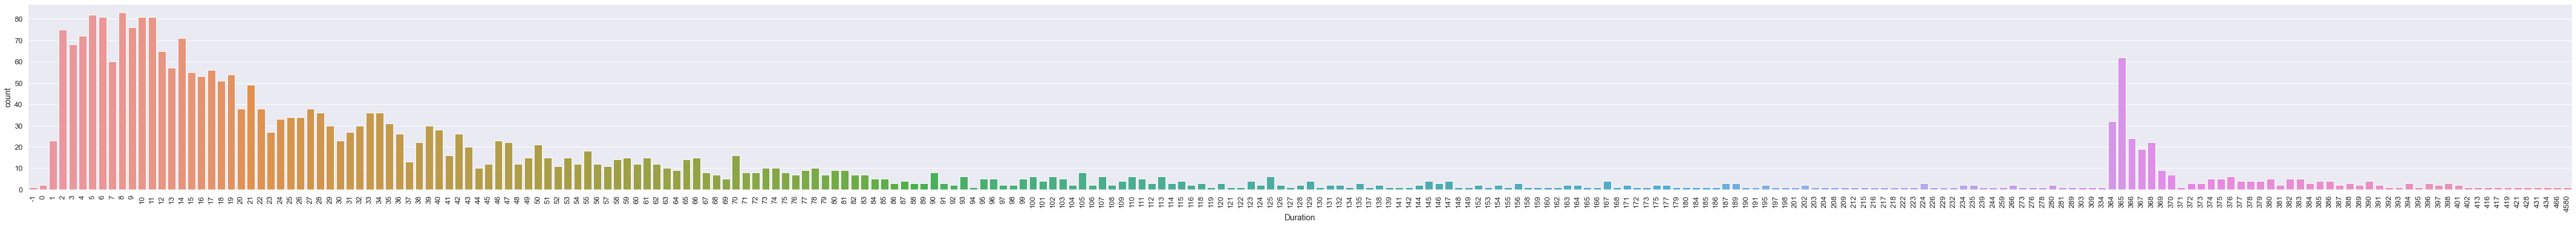

In [96]:
# To plot countplot for Duration

plt.figure(figsize=(80, 6))
sns.countplot(insurance_df['Duration']);
plt.xticks(rotation=90);


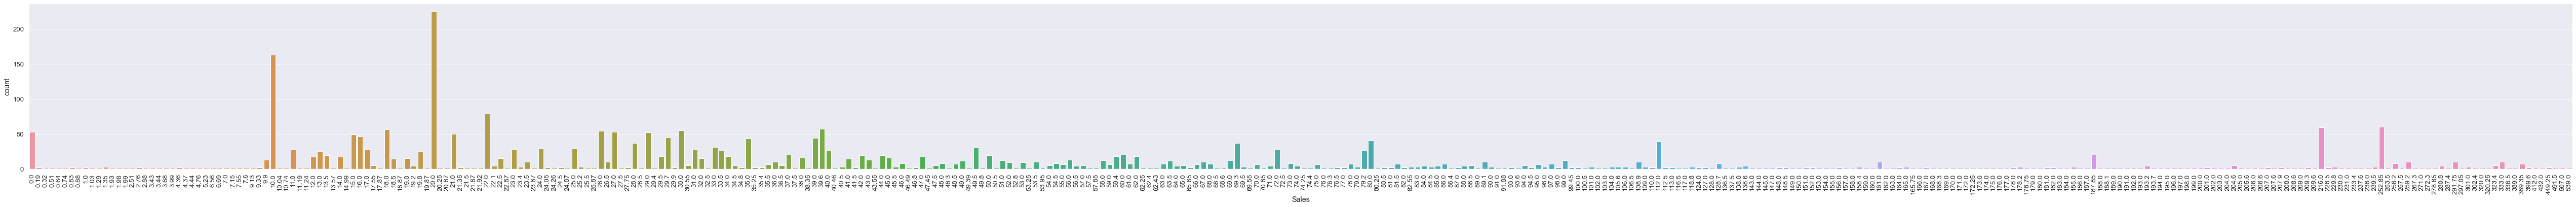

In [97]:
# To plot countplot for Sales

plt.figure(figsize=(90, 6))
sns.countplot(insurance_df['Sales']);
plt.xticks(rotation=90);


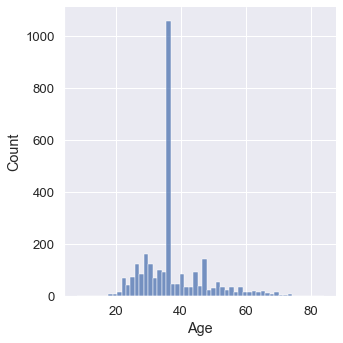

In [98]:
# To plot distplot for Age

sns.displot(insurance_df['Age']);


### 2.2 Data Split: Split the data into test and train(0.5 pts), build classification model CART (2.5 pts), Random Forest (2.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.


In [99]:
# splitting data into training and test set for independent attributes

#from sklearn.model_selection import train_test_split

#X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [100]:
# capture the target column ("Claimed") into separate vectors for training set and test set

#X = insurance_df.drop("Claimed", axis=1)

#y = insurance_df.Claimed


In [101]:
# splitting data into training and test set for independent attributes

X_train, X_test, y_train, y_test =train_test_split(insurance_df[['Age','Agency_Code','Type','Commision','Duration','Sales','Product Name', 'Destination']],\
                                                   insurance_df['Claimed'],test_size=0.30,random_state=1)

In [102]:
# Shape of the data

insurance_df.shape

(3000, 10)

In [103]:
# Shape of the train and test data

X_train.shape, X_test.shape

((2100, 8), (900, 8))

In [104]:
sum(y_train==0),len(y_train)-sum(y_train==0)

(1471, 629)

In [105]:
X_train.head()

,Age,Agency_Code,Type,Commision,Duration,Sales,Product Name,Destination
1045,36,2,1,0.00,30,20.00,2,0
2717,36,2,1,0.00,139,42.00,2,1
2835,28,0,0,46.96,367,187.85,4,0
2913,28,0,0,12.13,29,48.50,4,0
959,48,1,1,18.62,53,49.00,3,0


In [106]:
y_train.head()

1045    0
2717    0
2835    1
2913    1
959     0
Name: Claimed, dtype: int8

In [107]:
X_train.columns

Index(['Age', 'Agency_Code', 'Type', 'Commision', 'Duration', 'Sales',
       'Product Name', 'Destination'],
      dtype='object')

In [108]:
# Decision  tree

tree=DecisionTreeClassifier(max_depth=1,criterion='gini')

In [109]:
tree_classifier=tree.fit(X_train,y_train)

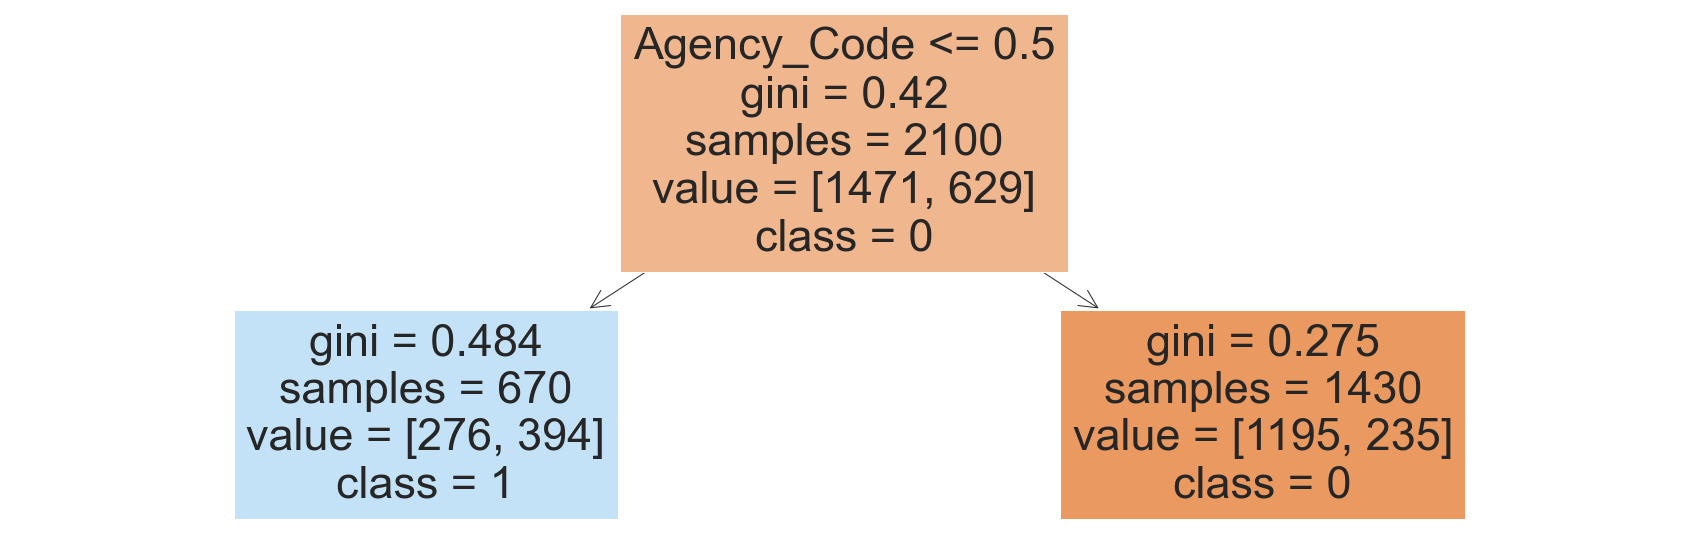

In [110]:
fig = plt.figure(figsize=(30,10))
_ = plot_tree(tree_classifier, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)

fig.savefig("decistion_tree.png")

In [111]:
y_pred=tree_classifier.predict(X_test) #y hat

In [112]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [113]:
y_test

1957    0
2087    1
1394    1
1520    1
1098    0
       ..
2363    0
270     0
517     1
2383    0
2201    0
Name: Claimed, Length: 900, dtype: int8

In [114]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Claimed,,
0,517,88
1,129,166


In [115]:
accuracy=(517+166)/X_test.shape[0]
accuracy

0.7588888888888888

In [116]:
error=(129+88)/X_test.shape[0]
error

0.2411111111111111

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_test,y_pred)

0.7588888888888888

In [119]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,y_pred)

440351963565115.3

In [120]:
from sklearn.metrics import mean_absolute_percentage_error

# Train the model on the training data
#model.fit(X_train, y_train)

# Use the model to make predictions on the test data
#pred = model.predict(X_test)

# Calculate the mean absolute percentage error of the predictions
#error = mean_absolute_percentage_error(y_test, pred)

#print(f'Mean absolute percentage error: {error:.2f}')

In [121]:
# Build a Random Forest with n_stimators = 1000, random_state =0

rf_accuracy_values_on_test=[]
for depth in range(2,30,3):
    model = RandomForestClassifier(n_estimators = 1000,random_state=0,max_depth=depth)
    model.fit(X_train, y_train)
    y_predict=model.predict(X_test)
    rf_accuracy_values_on_test.append(accuracy_score(y_test,y_predict))


In [122]:
y_test

1957    0
2087    1
1394    1
1520    1
1098    0
       ..
2363    0
270     0
517     1
2383    0
2201    0
Name: Claimed, Length: 900, dtype: int8

In [123]:
rf_accuracy_values_on_test

[0.7444444444444445,
 0.7655555555555555,
 0.7744444444444445,
 0.7677777777777778,
 0.7711111111111111,
 0.7655555555555555,
 0.7588888888888888,
 0.7544444444444445,
 0.7533333333333333,
 0.7544444444444445]

In [124]:
# finding the best value of max_depth

accuracy=[]
for i in range(2,30):
    tree=DecisionTreeClassifier(max_depth=i,criterion='gini')
    model=tree.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred)) 

In [125]:
accuracy

[0.7344444444444445,
 0.7755555555555556,
 0.7811111111111111,
 0.7733333333333333,
 0.7744444444444445,
 0.74,
 0.7588888888888888,
 0.7577777777777778,
 0.77,
 0.76,
 0.7488888888888889,
 0.7488888888888889,
 0.7411111111111112,
 0.7366666666666667,
 0.7277777777777777,
 0.7277777777777777,
 0.72,
 0.7177777777777777,
 0.7066666666666667,
 0.7222222222222222,
 0.7166666666666667,
 0.7188888888888889,
 0.7177777777777777,
 0.7188888888888889,
 0.7144444444444444,
 0.7177777777777777,
 0.7188888888888889,
 0.7188888888888889]

Text(0, 0.5, 'Accuracy')

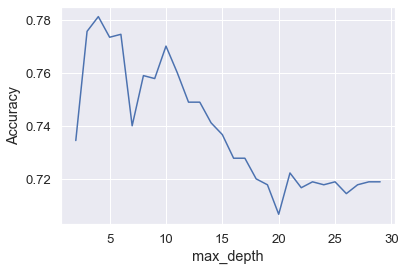

In [126]:
# To plot the max depth

plt.plot(range(2,30),accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [127]:
best_model=DecisionTreeClassifier(max_depth=3)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [128]:
predictions_test=tree_classifier.predict(X_test)
predictions_train=tree_classifier.predict(X_train)

In [129]:
pd.crosstab(y_test,predictions_test)

col_0,0,1
Claimed,,
0,517,88
1,129,166


In [130]:
Accuracy_test=(517+166)/len(y_test)
Accuracy_test

0.7588888888888888

In [131]:
pd.crosstab(y_train,predictions_train)

col_0,0,1
Claimed,,
0,1195,276
1,235,394


In [132]:
Accuracy_train=(1195+394)/len(y_train)
Accuracy_train

0.7566666666666667

In [133]:
# Depth 3

tree_3=DecisionTreeClassifier(criterion='gini')
tree_classifier_3=tree_3.fit(X_train,y_train)
predictions_test=tree_classifier_3.predict(X_test)
predictions_train=tree_classifier_3.predict(X_train)


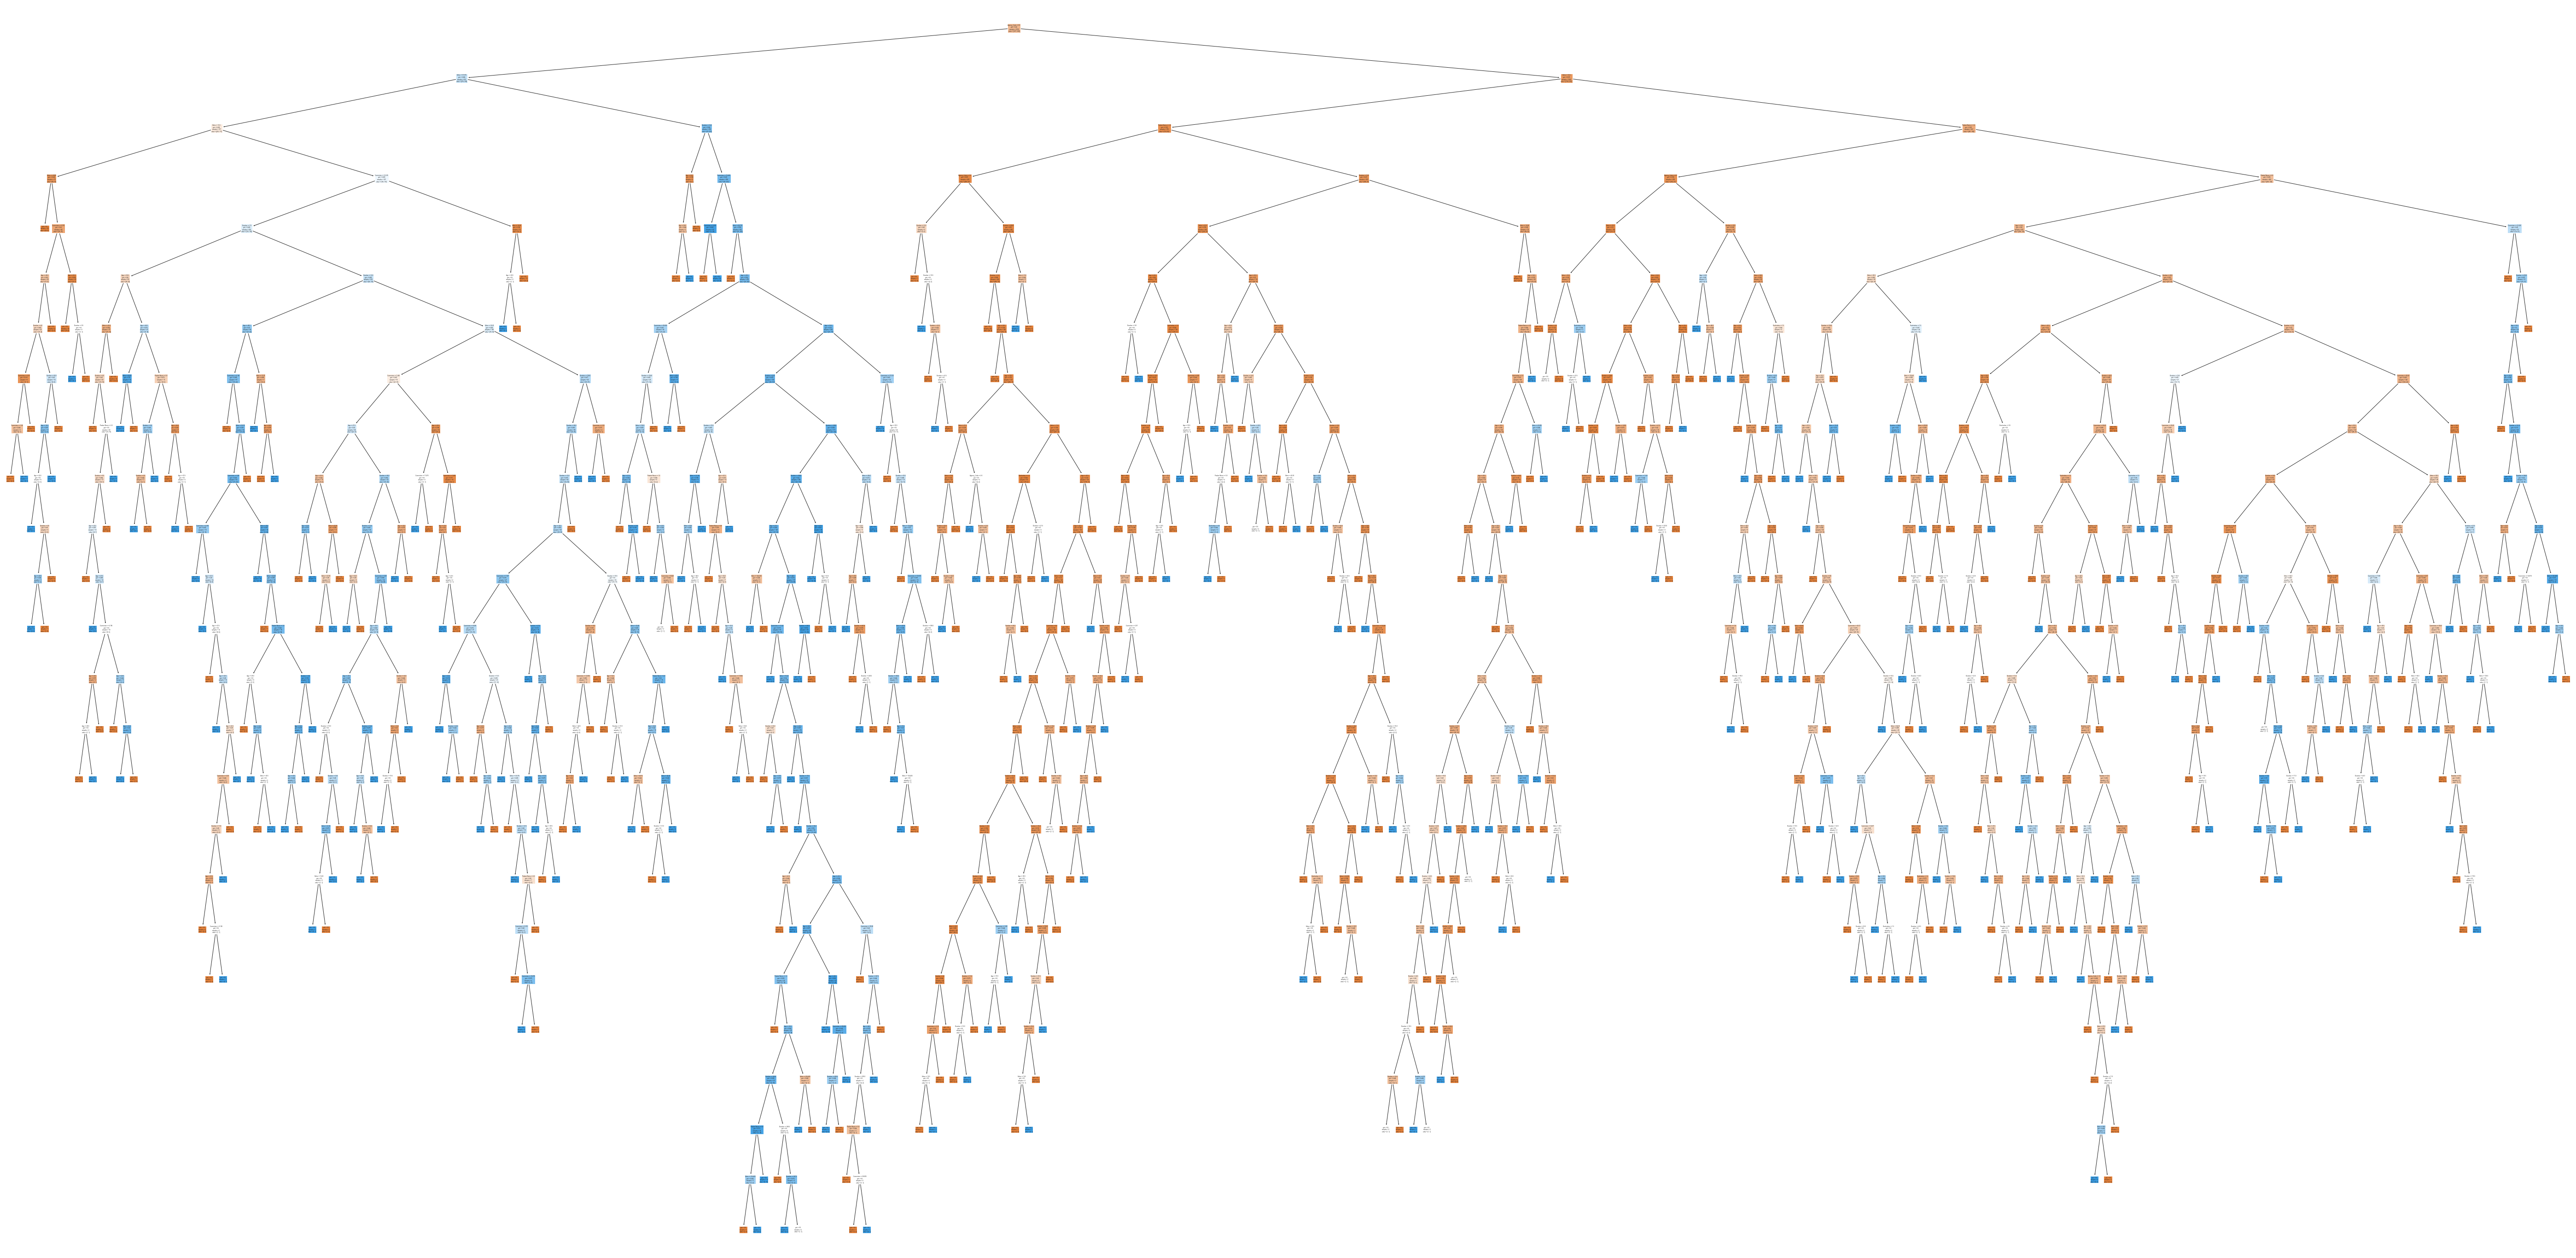

In [134]:
# Plot decission tree depth

fig = plt.figure(figsize=(100,50))
_ = plot_tree(tree_classifier_3, 
                   feature_names= ['Age', 'Agency_Code', 'Type', 'Commision', 'Duration', 'Sales',
       'Product Name', 'Destination'],
                   #class_names=['0','1'],
                   filled=True)

fig.savefig("decistion_tree_depth10.png")


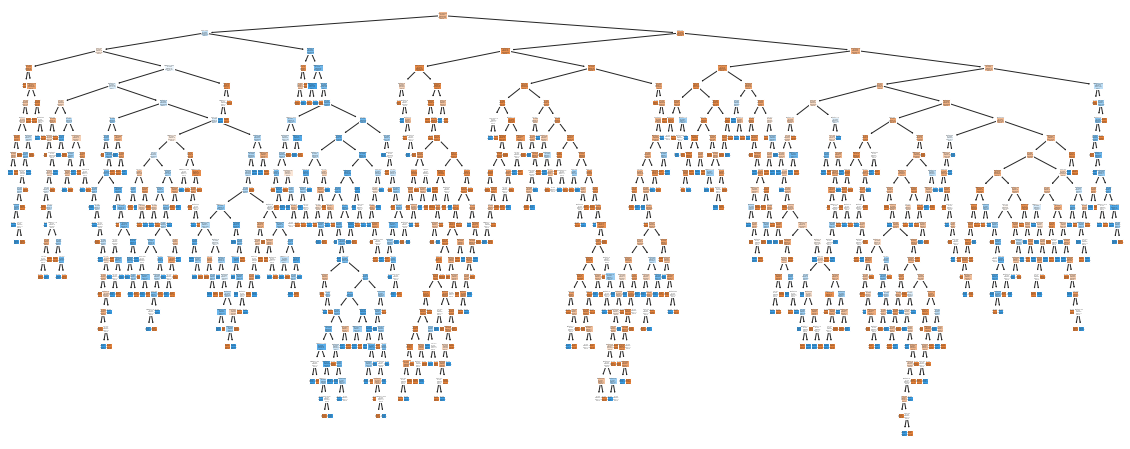

In [135]:
plt.figure(figsize=(20,8))
plot_tree(tree, feature_names=X_train.columns, class_names=['0','1'], filled = True)
plt.show()


In [136]:
pd.crosstab(y_test,predictions_test)

col_0,0,1
Claimed,,
0,494,111
1,146,149


In [137]:
Accuracy_test=(493+151)/len(y_test)
Accuracy_test

0.7155555555555555

In [138]:
pd.crosstab(y_train,predictions_train)

col_0,0,1
Claimed,,
0,1471,0
1,11,618


In [139]:
insurance_df.Channel=pd.Categorical(insurance_df.Channel).codes

In [140]:
#convert Agency_Code and Product Name to 0s and 1s using get_dummies in pandas

Agency_Code=pd.get_dummies(insurance_df.Agency_Code,drop_first=True)
Type=pd.get_dummies(insurance_df.Type,drop_first=True)
df=pd.concat((insurance_df.drop(['Agency_Code','Type'],axis=1),Agency_Code,Type),axis=1)

In [141]:
df.head()

,Age,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination,1,2,3,1
0,48,0,0.70,1,7,2.51,2,0,0,0,0,0
1,36,0,0.00,1,34,20.00,2,0,0,1,0,1
2,39,0,5.94,1,3,9.90,2,1,1,0,0,1
3,36,0,0.00,1,4,26.00,1,0,0,1,0,1
4,33,0,6.30,1,53,18.00,0,0,0,0,1,0


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [143]:
model_rf=RandomForestClassifier(max_depth=8,n_estimators=100)
model_rf=model_rf.fit(X_train,y_train)

In [144]:
model_rf

RandomForestClassifier(max_depth=8)

In [145]:
pred_rf=model_rf.predict(X_train)

In [146]:
pred_rf=model_rf.predict(X_test)

In [147]:
model_rf.score(X_train,y_train)

0.8552380952380952

In [148]:
accuracy_score(y_test,pred_rf)

0.7722222222222223

In [149]:
from sklearn.metrics import mean_absolute_percentage_error

In [150]:
mean_absolute_percentage_error(y_test,pred_rf)

250199979298361.03

In [151]:
# # To plot error mape

error_mape=[]
for i in range(3,20):
    rf=RandomForestRegressor(n_estimators=100,max_depth=i)
    model=rf.fit(X_train,y_train)
    pred=model.predict(X_test)
    error_mape.append(mean_absolute_percentage_error(y_test,pred))

Text(0.5, 1.0, 'error mape')

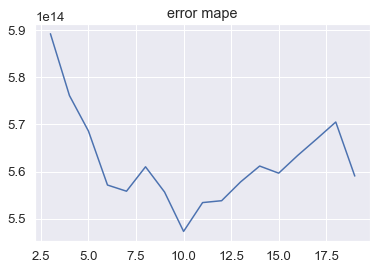

In [152]:
# To plot error mape

plt.plot(range(3,20),error_mape)
plt.title('error mape')

#### Perform Grid Search

In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [154]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

#### Get best parameters

In [155]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 150,
 'n_estimators': 301}

In [156]:
best_grid = grid_search.best_estimator_

In [157]:
#  Do a Variable Importance Plot with feature_importances from the RF Model vs columns

imp_df= pd.DataFrame({'Imp Score':model.feature_importances_, 'Columns':X_train.columns})
imp_df=imp_df.sort_values('Imp Score',ascending=False)
imp_df.head(10)


,Imp Score,Columns
4,0.248063,Duration
5,0.214669,Sales
1,0.185209,Agency_Code
0,0.181447,Age
3,0.097459,Commision
6,0.051815,Product Name
7,0.019827,Destination
2,0.001511,Type


Text(0.5, 1.0, 'feature_importances')

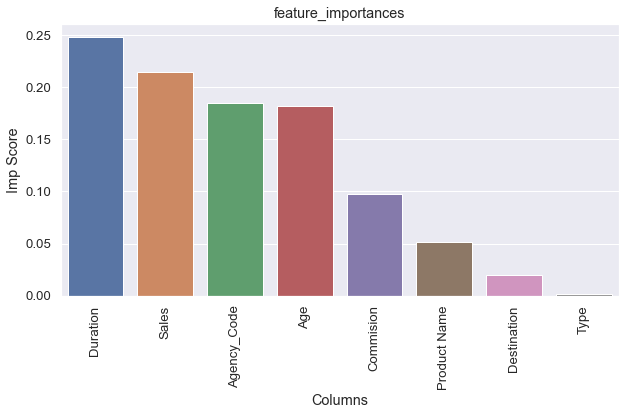

In [158]:
# Do a Variable Importance Plot with feature_importances from the RF Model vs columns

fig = plt.figure(figsize=(10,5))
sns.barplot(y='Imp Score',x='Columns',data=imp_df,orient="v");
plt.xticks(rotation=90);
plt.title('feature_importances')


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.


#### To plot confusion Matrix

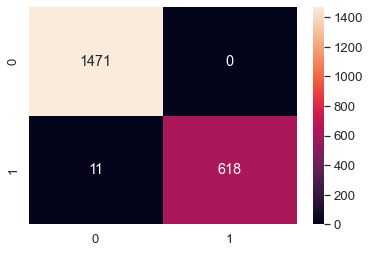

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix

sns.heatmap(confusion_matrix(y_train,predictions_train),annot=True,fmt='.4g');
#pd.crosstab(y_train,predictions_train)

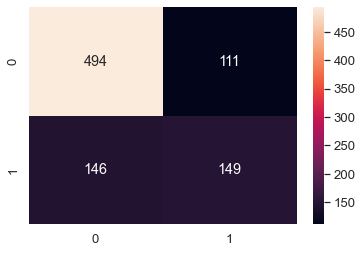

In [160]:
from sklearn.metrics import accuracy_score,confusion_matrix

sns.heatmap(confusion_matrix(y_test,predictions_test),annot=True,fmt='.4g');

#pd.crosstab(y_test,predictions_test)

In [161]:
# Build a Random Forest with n_stimators = 1000, random_state =0

rf_accuracy_values_on_test=[]
for depth in range(2,30,3):
    model = RandomForestClassifier(n_estimators = 1000,random_state=0,max_depth=depth)
    model.fit(X_train, y_train)
    y_predict=model.predict(X_test)
    rf_accuracy_values_on_test.append(accuracy_score(y_test,y_predict))


In [162]:
rf_accuracy_values_on_test


[0.7444444444444445,
 0.7655555555555555,
 0.7744444444444445,
 0.7677777777777778,
 0.7711111111111111,
 0.7655555555555555,
 0.7588888888888888,
 0.7544444444444445,
 0.7533333333333333,
 0.7544444444444445]

#### Evaluating model performance on the training data

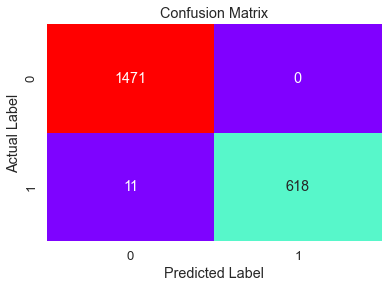

In [163]:
# Get the confusion matrix on the train data

confusion_matrix(y_train,predictions_train)
sns.heatmap(confusion_matrix(y_train,predictions_train),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [164]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_train,predictions_train))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1471
           1       1.00      0.98      0.99       629

    accuracy                           0.99      2100
   macro avg       1.00      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [165]:
print('Accuracy', ((1471+629)/(1471+629)))
print('Sensitivity',((629/629))) #TP/Actual yes                         
print('Specificity',(1471/1471)) #TN/Actual no
print('Precision',(629/629)) #TP/Predicted yes


Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


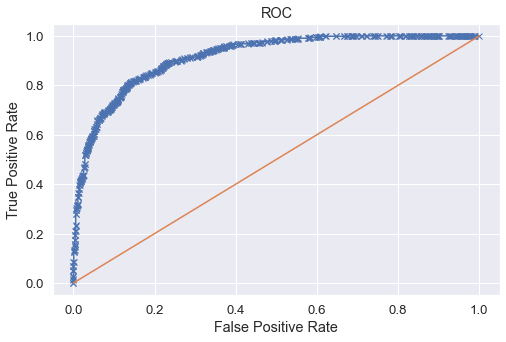

Area under Curve is 0.915980282277719


In [166]:
from sklearn.metrics import roc_curve,roc_auc_score

rf_fpr, rf_tpr,_=roc_curve(y_train, model_rf.predict_proba(X_train)[:,1])           
plt.figure(figsize=(8,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))                          
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()                                 
print('Area under Curve is', roc_auc_score(y_train,model_rf.predict_proba(X_train)[:,1]))


#### Evaluating model performance on the test data

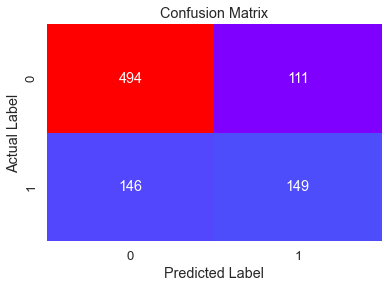

In [167]:
confusion_matrix(y_test,predictions_test)
sns.heatmap(confusion_matrix(y_test,predictions_test),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [168]:
print(classification_report(y_test,predictions_test))


              precision    recall  f1-score   support

           0       0.77      0.82      0.79       605
           1       0.57      0.51      0.54       295

    accuracy                           0.71       900
   macro avg       0.67      0.66      0.67       900
weighted avg       0.71      0.71      0.71       900



In [169]:
print('Accuracy', ((605+295)/(605+295)))
print('Sensitivity',((295/295))) #TP/Actual yes                         
print('Specificity',(605/605)) #TN/Actual no
print('Precision',(295/295)) #TP/Predicted yes


Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


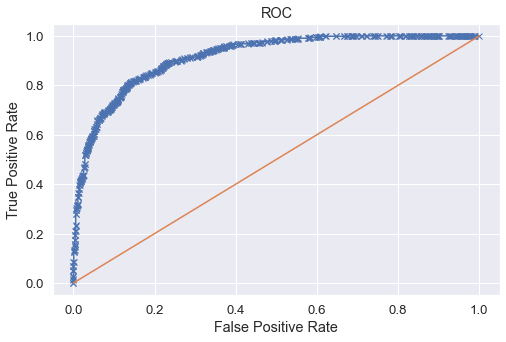

Area under Curve is 0.915980282277719


In [170]:
from sklearn.metrics import roc_curve,roc_auc_score

rf_fpr, rf_tpr,_=roc_curve(y_train, model_rf.predict_proba(X_train)[:,1])           
plt.figure(figsize=(8,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))                          
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()                                 
print('Area under Curve is', roc_auc_score(y_train,model_rf.predict_proba(X_train)[:,1]))


### 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.


### 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.


### Conclusion
#### Accuracy on the Training Data: 75.88%
#### Accuracy on the Test Data: 80.75%

#### AUC on the Training Data: 91.36%
#### AUC on the Test: 91.36%

#### Accuracy, AUC, Precision and Recall for test data is almost inline with training data.
#### This proves no overfitting or underfitting has happened, and overall the model is a good model for classification
#### Commision, Sales and age (in same order of preference) are the most important variables in determining it.